In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from matplotlib import animation, rc
from IPython.display import HTML, Image
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# plot settings
rc('animation', html='html5')

| Problem | TaskNum | m | n  | K | L  | F       | H          | Lanscape         |
| ------- | ------- | - | -- | - | -- | ------- | ---------- | ---------------- |
| ETMOF25 | 5       | 2 | 50 | 1 | 49 | F3 - F7 | H1         | L(rotation)      |
| ETMOF26 | 10      | 2 | 50 | 1 | 49 | F2, F3  | H1 - H3    | L(rotation)      |
| ETMOF27 | 10      | 3 | 50 | 7 | 43 | F6, F7  | H3         | b(Lg)            |
| ETMOF28 | 20      | 3 | 51 | 2 | 49 | F2, F3  | H3, H5, H7 | b(rotation)      |
| ERMOF29 | 30      | 3 | 51 | 2 | 49 | F1      | H4, H6     | b(shiftRotation) |
| ETMOF30 | 40      | 2 | 50 | 1 | 49 | F1      | H1         | b(shiftRotation) |
| ETMOF31 | 50      | 2 | 50 | 1 | 49 | F3      | H2         | L(rotation)      |
| ETMOF32 | 28      | 3 | 80 | 7 | 73 | F6      | H5         | b(Lg1)           |

In [2]:
problemset_profiles = {
    'ETMOF25': {'TaskNum': 5,
                'M': 2,
                'N': 50,
                'H': [1] * 5,
                'No': 25,},
    
    'ETMOF26': {'TaskNum': 10,
                'M': 2,
                'N': 50,
                'H': [i%3+1 for i in range(10)],
                'No': 26,},
    
    'ETMOF27': {'TaskNum': 10,
                'M': 3,
                'N': 50,
                'H': [3] * 10,
                'No': 27,},
    
    'ETMOF28': {'TaskNum': 20,
                'M': 3,
                'N': 51,
                'H': [1+2*(i%3+1) for i in range(20)],
                'No': 28,},
    
    'ETMOF29': {'TaskNum': 30,
                'M': 3,
                'N': 51,
                'H': [2*(2+i%2) for i in range(30)],
                'No': 29,},
    
    'ETMOF30': {'TaskNum': 40,
                'M': 2,
                'N': 50,
                'H': [1] * 40,
                'No': 30,},
    
    'ETMOF31': {'TaskNum': 50,
                'M': 2,
                'N': 50,
                'H': [2] * 50,
                'No': 31,},
    
    'ETMOF32': {'TaskNum': 28,
                'M': 3,
                'N': 80,
                'H': [5] * 28,
                'No': 32,},
}

problem_list = ['ETMOF'+str(i) for i in range(25, 33)]

In [5]:
def pf_gif(algo_idx, problem_profile, task_no, output=False):
    ALGOS = ['MaTDE', 'MOMFEA', 'MOEAD', 'MaOEAC', 'NSGAII']
    MULTITASK = ['MaTDE', 'MOMFEA', 'EMTET']

    ALGO = ALGOS[algo_idx]
    NO_PROBLEM = problem_profile['No']
    TASK_NUM = problem_profile['TaskNum']
    OBJECTIVE = problem_profile['M']
    VARIABLES = problem_profile['N']

    TASK = task_no
    H = problem_profile['H'][task_no-1]

    POP_SIZE = 100
    POP_SIZE = POP_SIZE * TASK_NUM if ALGO in MULTITASK else POP_SIZE
    FINAL = POP_SIZE * 1000

    BASE_PATH = 'datas//{0}//{0}_{1}Obj_ETMOF{2}_{3}_{4}D{5}.txt'

    PF_TYPES = [
        'convex',           # 1
        'concave',          # 2
        'lineoid',          # 3
        'inverted_lineoid', # 4
        'sphere',           # 5
        'inverted_sphere',  # 6
        'convex',           # 7
        'degenerate',       # 8
        'irconcave',        # 9
        'disconnected',     # 10
        'circle'            # F18, F19, F20
               ]

    PF_PATH = 'PF//StaticPF//{}_{}D.pf'


    # pfs = np.loadtxt(BASE_PATH.format(ALGO, OBJECTIVE, NO_PROBLEM, TASK, VARIABLES, POP_SIZE), dtype=np.float64)
    true_pf = np.loadtxt(PF_PATH.format(PF_TYPES[H-1], OBJECTIVE))

    if OBJECTIVE == 2:
        def update_points(i):
            step = POP_SIZE * 20
            pfs = np.loadtxt(BASE_PATH.format(ALGO, OBJECTIVE, NO_PROBLEM, TASK, VARIABLES, i * step))
            point_ani.set_offsets(pfs)
            text_pt.set_text("{}  ETMOF{}: evaluation={}".format(ALGO, NO_PROBLEM, i * step))

            x_upper = max(np.max(pfs[:,0]) * 1.5, 2)
    #         x_lower = np.min(true_pf[:,0]) * 0.9
            y_upper = max(np.max(pfs[:,1]) * 1.5, 2)
    #         y_lower = np.min(true_pf[:,1]) * 0.9
            fig.gca().set_xlim([0, x_upper])
            fig.gca().set_ylim([0, y_upper])

            return point_ani, text_pt


        def init():
            try:
                point_ani.set_offsets(np.loadtxt(BASE_PATH.format(ALGO, OBJECTIVE, NO_PROBLEM, TASK, VARIABLES, POP_SIZE), dtype=np.float64))
            except:
                point_ani.set_offsets(np.loadtxt(BASE_PATH.format(ALGO, OBJECTIVE, NO_PROBLEM, TASK, VARIABLES, 2000), dtype=np.float64))
            text_pt.set_text("{}  ETMOF{}: evaluation={}".format(ALGO, NO_PROBLEM, 0))

            return point_ani, text_pt


        fig = plt.figure(tight_layout=True)
        plt.scatter(true_pf[:,0], true_pf[:,1], s=50, c='#0000FF')

        point_ani = plt.scatter([], [], s=5, c='#FF0000')
        # text_pt = plt.text(0.8, 0.8, '', fontsize=16)
        text_pt = plt.title('')
        plt.grid(ls='--')



    elif OBJECTIVE == 3:
        def update_points(i):
            step = POP_SIZE * 20

            pfs = np.loadtxt(BASE_PATH.format(ALGO, OBJECTIVE, NO_PROBLEM, TASK, VARIABLES, i * step))
            point_ani._offsets3d = (pfs[:,0], pfs[:,1], pfs[:,2])
            text_pt.set_text("{}  ETMOF{}: evaluation={}".format(ALGO, NO_PROBLEM, i * step))

            x_upper = max(np.max(pfs[:,0]) * 1.5, 5)
    #         x_lower = np.min(true_pf[:,0]) * 0.9
            y_upper = max(np.max(pfs[:,1]) * 1.5, 5)
    #         y_lower = np.min(true_pf[:,1]) * 0.9
            z_upper = max(np.max(pfs[:,2]) * 1.5, 5)
    #         z_lower = np.min(true_pf[:,2]) * 0.9
            fig.gca().set_xlim([0, x_upper])
            fig.gca().set_ylim([0, y_upper])
            fig.gca().set_zlim([0, z_upper])

            return point_ani, text_pt


        def init():
            try:
                pfs = np.loadtxt(BASE_PATH.format(ALGO, OBJECTIVE, NO_PROBLEM, TASK, VARIABLES, POP_SIZE), dtype=np.float64)
            except:
                pfs = np.loadtxt(BASE_PATH.format(ALGO, OBJECTIVE, NO_PROBLEM, TASK, VARIABLES, 2000), dtype=np.float64)
            point_ani._offsets3d = (pfs[:,0], pfs[:,1], pfs[:,2])
            text_pt.set_text("{}  ETMOF{}: evaluation={}".format(ALGO, NO_PROBLEM, 0))
            return point_ani, text_pt

        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(true_pf[:,0], true_pf[:,1], true_pf[:,2], s=50, c='#0000FF')

        point_ani = ax.scatter([], [], [], c='#FF0000')
        text_pt = plt.title('')
        plt.grid(ls='--')

    ani = animation.FuncAnimation(fig, update_points, np.arange(1, 50), init_func=init, interval=100, repeat=True)
    if output:
        import os
        folder = 'gifs'
        file = '{}_ETMOF{}_T{}_O{}.gif'.format(ALGO, NO_PROBLEM, TASK, OBJECTIVE)
        if not os.path.exists(folder):
            os.mkdir(folder)
        ani.save(folder + '//' + file)
    return ani



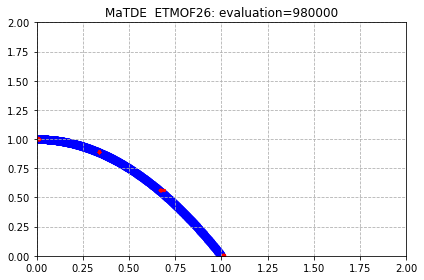

In [7]:
# 0: 'MaTDE', 
# 1: 'MOMFEA'
# 2: 'MOEAD'
# 3: 'MaOEAC'
# 4: 'NSGAII'
for problem in ['ETMOF26']:
    for algo in [0]:
        for task in [5]:
            pf_gif(algo, problemset_profiles[problem], task, True)

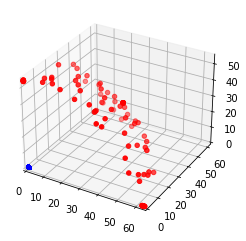

In [307]:
# final PF
pfs = np.loadtxt(BASE_PATH.format(ALGO, OBJECTIVE, NO_PROBLEM, TASK, VARIABLES, FINAL), dtype=np.float64)
true_pf = np.loadtxt(PF_PATH.format(PF_TYPES[H-1], OBJECTIVE))

if OBJECTIVE == 2:
    plt.scatter(pfs[:,0], pfs[:,1], c='#FF0000')
    plt.scatter(true_pf[:,0], true_pf[:,1], c='0000FF')
elif OBJECTIVE == 3:
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(pfs[:,0], pfs[:,1], pfs[:,2], c='#FF0000')
    ax.scatter(true_pf[:,0], true_pf[:,1], true_pf[:,2], s=5, c='#0000FF')
    fig.gca().set_xlim([0, max(np.max(pfs[:,0]), np.max(true_pf[:,0]))])
    fig.gca().set_ylim([0, max(np.max(pfs[:,1]), np.max(true_pf[:,1]))])
    fig.gca().set_zlim([0, max(np.max(pfs[:,2]), np.max(true_pf[:,2]))])
